<a href="https://colab.research.google.com/github/arsalanyaghoobi/Language-Detction-Updated-Version-/blob/main/finalized_language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget https://downloads.tatoeba.org/exports/sentences.csv

--2021-02-21 18:42:50--  https://downloads.tatoeba.org/exports/sentences.csv
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511306255 (488M) [application/octet-stream]
Saving to: ‘sentences.csv.1’

sentences.csv.1     100%[===================>] 487.62M  31.1MB/s    in 16s     

2021-02-21 18:43:07 (30.1 MB/s) - ‘sentences.csv.1’ saved [511306255/511306255]



In [9]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils

In [10]:
import pandas as pd


data = pd.read_csv('sentences.csv',
                            sep='\t', 
                            encoding='utf8', 
                            index_col=0,
                            names=['lang','text'])


len_cond = [True if 20<=len(s)<=200 else False for s in data['text']]
data = data[len_cond]

lang = ['eng', 'fra', 'deu']
data = data[data['lang'].isin(lang)]

data_trim = pd.DataFrame(columns=['lang','text'])

for l in lang:
    lang_trim = data[data['lang'] ==l].sample(80000, random_state=100)
    data_trim = data_trim.append(lang_trim)

X = data_trim
encoder = LabelEncoder()
aa = encoder.fit_transform(data_trim['lang'])
Y = np_utils.to_categorical(aa)
X_train, test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
train, valid, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 


In [11]:
len(train)

144000

In [12]:
train.to_csv('train.csv')
valid.to_csv('valid.csv')
test.to_csv('test.csv')

In [13]:
features = {}
features_set = set()

for l in lang:
    
    corpus = train[train.lang==l]['text']
    
    vectorizer = CountVectorizer(analyzer='char',
                            ngram_range=(3, 3)
                            ,max_features=200)
    
    X = vectorizer.fit_transform(corpus)
    
    trigrams = vectorizer.get_feature_names()
    
    features[l] = trigrams 
    features_set.update(trigrams)

    
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f]=i

In [17]:
vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(3, 3),
                            vocabulary=vocab)

corpus = train['text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

train_feature = pd.DataFrame(data=X.toarray(),columns=feature_names)
train_min = train_feature.min()
train_max = train_feature.max()
train_feat = (train_feature - train_min)/(train_max-train_min)

train_feature['lang'] = list(train['lang'])
corpus = valid['text']   
X = vectorizer.fit_transform(corpus)

valid_feature = pd.DataFrame(data=X.toarray(),columns=feature_names)
valid_feature = (valid_feature - train_min)/(train_max-train_min)
valid_feature['lang'] = list(valid['lang'])

corpus = test['text']   
X = vectorizer.fit_transform(corpus)

test_feature = pd.DataFrame(data=X.toarray(),columns=feature_names)
test_feature = (test_feature - train_min)/(train_max-train_min)
test_feature['lang'] = list(test['lang'])


In [19]:
valid

,lang,text
4493629,eng,Tom has a very large nose.
5293881,fra,Jeanne regardait votre fleur.
1053235,eng,It's totally dark outside.
430131,fra,Cette bière est amère.
7174898,eng,Tom thought that he was going to lose Mary.
...,...,...
8107331,fra,Nous ne ferons pas ça sans leur permission.
608094,eng,Often the fear of one evil leads us into a worse.
6527038,eng,"Tom and Mary are both quite strong, aren't they?"
7476772,eng,They enjoy what they do.


In [20]:
train_feature.to_csv('train_feature.csv')
valid_feature.to_csv('valid_feature.csv')
test_feature.to_csv('test_feature.csv')

In [21]:
!ls

sample_data	 test.csv	   train_feature.csv
sentences.csv	 test_feature.csv  valid.csv
sentences.csv.1  train.csv	   valid_feature.csv


In [24]:
train_feature = pd.read_csv("train_feature.csv",index_col =0)
valid_feature = pd.read_csv("valid_feature.csv",index_col =0)
test_feature = pd.read_csv("test_feature.csv",index_col =0)

In [26]:
valid_feature


,l'a,ka,th,ten,qu,t h,rei,wir,tio,lie,wei,he,ehr,e c,une,lei,on,s t,e v,is,wi,as,ine,nge,e g,me,at.,ien,is,ih,do,ét,iel,ind,as,n',ic,all,fo,la,...,ir,den,t a,d t,con,ter,his,e e,vai,hat,go,s l,cht,nen,he,éta,e d,ben,en,ca,sa,hte,pas,zu,der,'s,pe,n m,com,sn',uch,don,ce,wer,su,o d,ern,ted,the,lang
0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.0,0.0,0.00,0.0,0.166667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,eng
1,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,fra
2,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.25,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,eng
3,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,fra
4,0.0,0.0,0.00,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.00,0.0,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,fra
47996,0.0,0.0,0.00,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.333333,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,eng
47997,0.0,0.0,0.25,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,eng
47998,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,

In [27]:
x = train_feature.drop('lang', axis=1)
x_val = valid_feature.drop('lang', axis=1)

In [29]:
number_of_class = len(lang)
model = Sequential()
model.add(Dense(600, input_dim=464, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(number_of_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/20
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0424 - accuracy: 0.9874 - val_loss: 0.0792 - val_accuracy: 0.9924
Epoch 2/20
2250/2250 [==============================] - 6s 3ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.1108 - val_accuracy: 0.9840
Epoch 3/20
2250/2250 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0580 - val_accuracy: 0.9890
Epoch 4/20
2250/2250 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 5/20
2250/2250 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0886 - val_accuracy: 0.9805
Epoch 6/20
2250/2250 [==============================] - 6s 3ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0551 - val_accuracy: 0.9885
Epoch 7/20
2250/2250 [==============================] - 6s 3ms/step - loss: 5.4974e-04 - accuracy: 0.9999 - val_loss: 0.0650 - val_accur

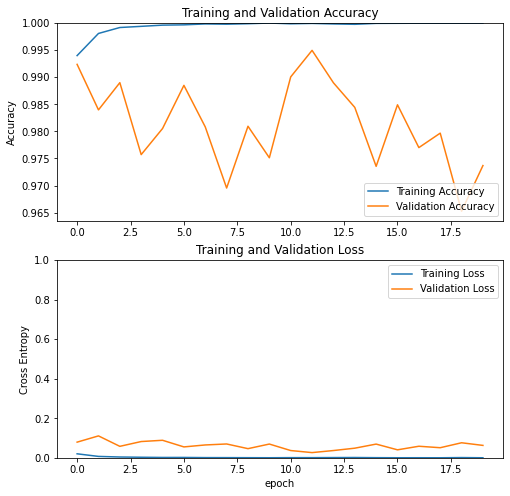

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

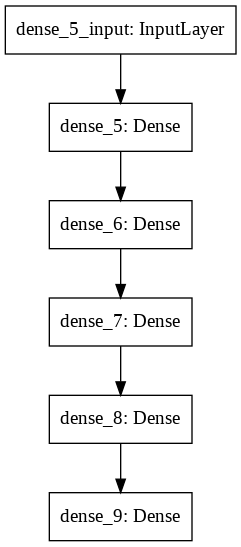

In [32]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'numpy.ndarray'>
0.9724583333333333


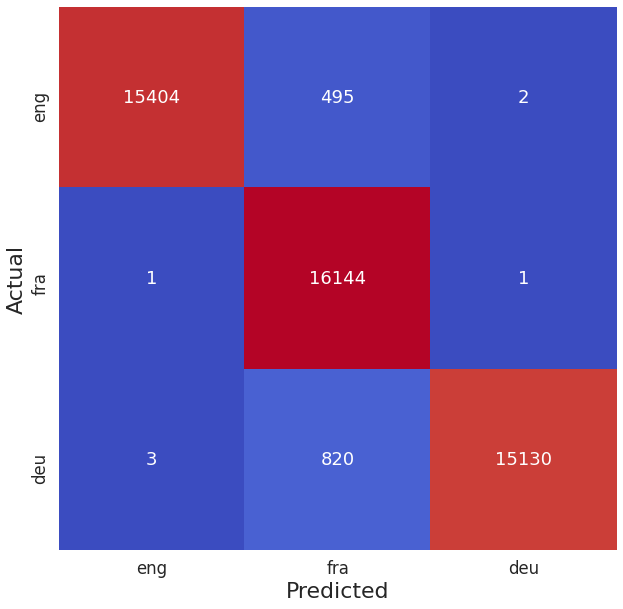

In [33]:
x_test = test_feature.drop('lang',axis=1)
if len(y_test[0]) > 0:
  y_test = [np.where(r==1)[0] for r in y_test]
labels = model.predict_classes(x_test)

print(type(y_test[0]))
accuracy = accuracy_score(y_test,labels)
print(accuracy)

conf_matrix = confusion_matrix(y_test,labels)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig('model_eval.png',format='png',dpi=150)

In [34]:
len(y_test[0])

1

In [35]:
vocab


{' a ': 410,
 ' al': 52,
 ' an': 238,
 ' ar': 253,
 ' as': 21,
 ' au': 138,
 ' av': 89,
 ' be': 322,
 ' bi': 82,
 ' bo': 202,
 ' ca': 444,
 ' ce': 159,
 ' ch': 339,
 ' co': 298,
 " d'": 424,
 ' da': 101,
 ' de': 244,
 ' di': 394,
 ' do': 30,
 ' du': 43,
 ' dé': 275,
 ' ei': 366,
 ' en': 443,
 ' er': 248,
 ' es': 277,
 ' et': 49,
 ' fa': 324,
 ' fo': 38,
 ' fr': 397,
 ' ge': 265,
 ' go': 435,
 ' ha': 393,
 ' he': 439,
 ' hi': 369,
 ' ho': 237,
 ' i ': 199,
 ' ic': 36,
 ' ih': 29,
 ' in': 208,
 ' is': 28,
 ' it': 230,
 ' je': 349,
 ' ka': 1,
 ' kn': 157,
 " l'": 329,
 ' la': 39,
 ' le': 242,
 ' li': 124,
 ' lo': 175,
 ' ma': 47,
 ' me': 306,
 ' mi': 272,
 ' mo': 88,
 " n'": 35,
 ' ne': 135,
 ' ni': 123,
 ' no': 405,
 ' of': 327,
 ' on': 16,
 ' pa': 76,
 ' pe': 451,
 ' pl': 46,
 ' po': 50,
 ' pr': 357,
 ' qu': 4,
 ' re': 269,
 ' sa': 445,
 ' sc': 398,
 ' se': 423,
 ' sh': 317,
 ' si': 148,
 ' so': 388,
 ' st': 274,
 ' su': 459,
 ' te': 91,
 ' th': 106,
 ' to': 365,
 ' tr': 399,
 ' un': 95

In [36]:
vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(3, 3),
                            vocabulary=vocab)

words = ['blackbord', 'apfel', 'la siège']
words_vectors = vectorizer.fit_transform(words)
feature_names = vectorizer.get_feature_names()
words_feature = pd.DataFrame(data=words_vectors.toarray(),columns=feature_names)

In [37]:
words_feature

,l'a,ka,th,ten,qu,t h,rei,wir,tio,lie,wei,he,ehr,e c,une,lei,on,s t,e v,is,wi,as,ine,nge,e g,me,at.,ien,is,ih,do,ét,iel,ind,as,n',ic,all,fo,la,...,d',ir,den,t a,d t,con,ter,his,e e,vai,hat,go,s l,cht,nen,he,éta,e d,ben,en,ca,sa,hte,pas,zu,der,'s,pe,n m,com,sn',uch,don,ce,wer,su,o d,ern,ted,the
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
labels = model.predict_classes(words_feature)
encoder.inverse_transform(labels)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['eng', 'eng', 'fra'], dtype=object)